<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`
   3. sort lists of dated files even if they are sorted correctly by default on your machine

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Michael Murdock**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 10 Homework - Time Series Data

To complete assignment 10, be sure to review the following chapters:

* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/" target="_blank"> Time series data in Pandas </a>
* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/" target="_blank">The overview of the 2013 Floods in Colorado, USA</a>

in the Earth Lab Intermediate Earth Data Science online textbook on the earthdatascience.org website.


## Streamflow and Precipitation Data During the Boulder 2013 Flood Event

### Data Selection

For this assignment, you will write Python code to download and work with time 
series data associated with a large flood event that occured in Boulder, CO, USA in 2013. You will explore the relationship between precipitation and stream discharge 
for Boulder Creek as they increased and decreased during the flood 
event. You will also consider how the values compared to previous years before 
the flood event. 

In the cell below, explain what data you will need to complete this analysis, including:
  1. What type or types of data do you need?
  2. How many years of data do you need at minimum?
  3. For this assignment, you will use Boulder, CO precipitation data from the National Oceanic and Atmosphereic Administration (NOAA) and streamflow data from the U.S. Geological Survey (USGS). Both should be at daily resolution or higher Are there any other data source options for retrieving the data you need? What are some advantages and/or disadvantages of other sources for this analysis?

1. A date, that's converted into a DateTime object and a continuous or discrete value.
2. 2 years
3. There are other data source options like CoCoRaHS, OpenTopography, The National Map, etc. A disadvantage is oftentimes granularity and time it takes to acquire or read in the data, while the main advantage is credibility compared to provisional data in USGS and other types of data that may enhance our analysis.

### Data Download
Practice downloading the data you need. **You will not use your downloaded data in the analysis, but you must follow these steps to get the correct urls.** In the cell below, use the following instructions to get urls for downloading the NOAA and USGS data:

#### Download Precipitation data from NOAA:

* Go to the [NOAA NCEI search page](https://www.ncdc.noaa.gov/cdo-web/search)
    * In the dataset field, select the `Precipitation Hourly` dataset
    * In the `Date Range` field, select data from January 1, 1984 to January 1, 2014 (30 years)
    * In the `Search For` field, select `Station`
    * In the search box, type `Boulder, CO`
    * Press `Search`
* You should see a list of stations matching your criteria. The first options should be `Boulder 2, CO US`.
    * Click on the station in the list on the left. Check that the station is indeed near Boulder, CO.
    * Click the orange `ADD TO CART` button
    * Hover over the orange `Cart (Free Data)` button on the top right, and click `View All Items (1)`
* Click through the check out process
    * Check that you are downloading a CSV file
    * Check that your dates are correct
    * Click `Continue`
* Check the `Precipitation` box and click `Continue`
* Enter your email address and click `Submit Order`
* Check your email. When your data finishes generating, click open the email link and copy the download link (should end in .csv)
* Wait for your order to be completed.
    * Click `Check Order Status` once the page loads
    * OR you can check your email and follow the order status link there
* Right click the `Download` button and copy the link to **paste in the cell below**
    
    
#### Download Streamflow data from the USGS:

* Go to the [USGS NWIS Water Data for the Nation mapper application](https://maps.waterdata.usgs.gov/mapper/index.html)
* Search for `Boulder, CO` under `Place name:`
* Click on the location near 75th St. in Boulder.
* Click on `Daily Data`
* Select the entire available date range, and set your results to be as `Tab-separated`, and press `Go`
* Copy the url that populates in your browser window and paste it below
    

Data urls:
  * NOAA precipitation: https://www.ncei.noaa.gov/orders/cdo/3093689.csv
  * USGS streamflow: https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=06730200&referred_module=sw&period=&begin_date=1838-01-01&end_date=2022-09-27

#### Exploring APIs

One way to access data is through an Application Programming Interface, or API. 

1. What parameter would you change in the USGS url if you wanted to switch locations?
2. Generate a url to download metadata about the precipitation *station* using [the NCEI CDO web services API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2) (HINT: click on the `/stations` endpoint link and look at the examples. You can get your station ID from your order summary or the map.)

> **NOTE:** You don't need to download data for this exercise. If you want to actually download the NOAA data in your Jupyter notebook for your own curiosity, **PLEASE READ THIS FIRST**. You can download  using either the `requests` library or the specialized `pyncei` library. In either case, you will need to request a token. If you do, **MAKE SURE TO DELETE YOUR INDIVIDUAL TOKEN BEFORE UPLOADING YOUR HOMEWORK!!** GitHub is not a secure place to store tokens, and if you accidentally commit one you will need to remove it from the entire history - committing a version of the file without the token is not secure because the old version can be reconstructed. Ideally, you would store tokens in a file outside your repository (for example, `~/.ncei_token` would be a typical way of making this reproducible).


1. we would change our site_no parameter

2. https://www.ncei.noaa.gov/cdo-web/api/v2/stations/COOP:050843

### Data description and citation

For each dataset, include the following information:
  1. A 1-2 sentence description of the data
  2. Data citation
  3. What are the units?
  4. What is the time interval for each data point?
  5. Is there a "no data" or NA value? Note that for the NOAA data, this information IS available in the documentation (and it's different from the NA value in the earthpy version of the data)

NOAA Precipitation dataset:

1. Hourly precipitation data for over 7000 stations, collected from NWS reporting stations, volunteer observers, FAA, utility companies, etc. Specifically pulling in hourly precipitation data for Boulder county.
2. DOC/NOAA/NESDIS/NCEI > National Centers for Environmental Information, NESDIS, NOAA, U.S. Department of Commerce & DOC/NOAA/NESDIS/NCDC > National Climatic Data Center, NESDIS, NOAA, U.S. Department of Commerce
3. Units are in hundredths of inches or tenths of millimeters
4. The time interval is 60 minutes (1 hour)
5. NA value is 99999, or 999.99 in decimal form

USGS Streamflow dataset:

1. Daily mean discharge data for Boulder County from site - 06730200 BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO. Date range for Boulder County spans from September 1987 to current.
2. U.S. Geological Survey, 2022, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed [September 28, 2022], https://nwis.waterdata.usgs.gov/nwis/wys_rptdv_ts_ids=&&adr_begin_date=2022-10-01&adr_end_date=2023-09-30&site_no=06730200&agency_cd=USGS
3. Units are in cubic feet per second
4. The time interval is 24 hours (1 day)
5. Did not see a specified NA value

## Import Python Packages

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code to import the package/module needed to:
* create plots
* set your working directory
* download data using earthpy functions
* work with `pandas` DataFrames

You will need a special **Python** package to help format the dates when plotting your data. Make sure to include the line below which imports `DateFormatter` from `matplotlib`.

```
from matplotlib.dates import DateFormatter
```

Be sure to list the package imports following the appropriate PEP 8 order and 
spacing requirements. 

In [1]:
# import packages
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import os
import earthpy as et
import pandas as pd

In [2]:
# Additional imports for testing
import numpy as np

In [3]:
# Test package imports - DO NOT MODIFY THIS CELL!
import_answer_points = 0

try:
    na_val = pd.NA
    print("\u2705 Score! Pandas has been imported as a pd!")
    import_answer_points += 1
except NameError:
    print("\u274C Pandas has not been imported as a pd, please make "
          "sure to import is properly.")

try:
    t = plt.show()
    print("\u2705 Nice! matplotlib.pyplot has been imported as plt!")
    import_answer_points += 1
except NameError:
    print("matplotlib.pyplot has not been imported as plt, please "
          "make sure to import this properly.")

try:
    wd = os.getcwd()
    print("\u2705 Great work! The os module has imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the os package is imported.")

try:
    data = et.io
    print("\u2705 Score! The earthpy package has imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the earthpy package is imported "
          "using the alias et.")

try:
    the_date = DateFormatter
    print("\u2705 Nice! The DateFormatter module from matplotlib has "
          "imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the DateFormatter module from "
          "matplotlib is imported.")

print("\n \u27A1 You received {} out of 5 points."
      .format(import_answer_points))

import_answer_points

✅ Score! Pandas has been imported as a pd!
✅ Nice! matplotlib.pyplot has been imported as plt!
✅ Great work! The os module has imported correctly!
✅ Score! The earthpy package has imported correctly!
✅ Nice! The DateFormatter module from matplotlib has imported correctly!

 ➡ You received 5 out of 5 points.


5

## Download and locate data

Data are often secured, even when the data is open, similarly to the NOAA data here. Using online data stores is one way to make your workflow reproducible if there's not a simple way to download or access the data via API. For example, you can place data on Google Drive or a domain-specific repository such as CUASHI Hydroshare and get a download link (although this is often not the same as a 'Share' link).

For the purposes of this assignment, the data you need is already stored online and accessible via the `earthpy` package.

### Download subset from earthpy

In the cell below complete the following task:

1. First, use EarthPy to download the `colorado-flood` data:

   ```python
   et.data.get_data("colorado-flood")
   ```
   
   When you download the data, the `earth-analytics` > `data` > `colorado-flood` directory gets created on your computer for you. **Use this earthpy data** instead of the data you downloaded from NCEI and NWIS earlier in the assignment so that I can reproduce your analysis.
2. **Use a conditional statement** to:
    * Set the working directory to the `earth-analytics` > `data` > `colorado-flood` directory in your home directory if the path exists.
    * Print a helpful message or raise a descriptive error if the path does not exist. 

In [4]:
# use earthpy to get colorado flood data
colorado_flood_path = et.data.get_data("colorado-flood")

# if the colorado flood path exists, set our working directory
if os.path.exists(colorado_flood_path):
    os.chdir(os.path.join(et.io.HOME,
                          'earth-analytics',
                          'data',
                          'colorado-flood'))
# else print error message
else:
    print('Path does not exist, check working directory.')

In [5]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-3:] == ['earth-analytics', 'data', 'colorado-flood']:
    print("\u2705 Great - it looks like your working directory is set "
          "correctly to the colorado-flood directory")
    wd_points += 2
else:
    print("\u274C Oops, your working directory is not set to "
          " the colorado-flood directory created by earthpy")

print("\n \u27A1 You received {} out of 2 points for setting your "
      "working directory."
      .format(wd_points))

wd_points

✅ Great - it looks like your working directory is set correctly to the colorado-flood directory

 ➡ You received 2 out of 2 points for setting your working directory.


2

### Explore your filesystem to find your downloaded files

The cell below is configured to run bash commands because it starts with `%%bash`. **Below the `%%bash` line**, execute a bash command to print out all the files in the colorado-flood data subset.

In [6]:
%%bash
find .

.
./.DS_Store
./precipitation
./precipitation/PRECIP_HLY_documentation.pdf
./precipitation/805333-precip-daily-1948-2013.csv
./precipitation/805325-precip-dailysum-2003-2013.csv
./precipitation/805325-precip-daily-2003-2013.csv
./precipitation/precip-boulder-aug-oct-2013.csv
./discharge
./discharge/README_dischargeMetadata.rtf
./discharge/06730200-discharge-daily-1986-2013.csv
./discharge/06730200-discharge-daily-1986-2013.txt
./spatial
./spatial/boulder-leehill-rd
./spatial/boulder-leehill-rd/clip-extent.qpj
./spatial/boulder-leehill-rd/clip-extent.prj
./spatial/boulder-leehill-rd/README.md
./spatial/boulder-leehill-rd/clip-extent.dbf
./spatial/boulder-leehill-rd/post-flood
./spatial/boulder-leehill-rd/post-flood/lidar
./spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_hill.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DSM_hill.tif
./spatial/boulder-leehil

# Set data paths
Create paths with the `os` package for the two datasets below: 
  * precipitation dataset from 1948-2013 in csv format
  * daily streamflow (discharge) dataset from 1984 to 2013 in csv format
  
**Use the `os` package to ensure that the paths you create will run successfully on any operating system.** 

In [7]:
# using os path join to set precipitation path to csv file
precip_path = os.path.join('precipitation',
                           '805333-precip-daily-1948-2013.csv')

# using os path join to set discharge/streamflow path to csv file
streamflow_path = os.path.join('discharge',
                               '06730200-discharge-daily-1986-2013.csv')

## Challenge 1: Open Precipitation Data Using Pandas

Using the `read_csv()` function in `pandas`, read in your precipitation data. Don't forget to use the `parse_dates` argument to parse the `DATE` column, and to set the `na_values` to the value specified in the information given about this data above. Set the `DATE` column to be the index of the DataFrame.

Call the final `DataFrame` object at the end of the cell. 

In [8]:
# reading in precip data, parsing dates, setting index, and specify NA values
precip_df = pd.read_csv(precip_path,
                        parse_dates=['DATE'],
                        index_col=['DATE'],
                        na_values=[999.99])

precip_df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.10,,


In [9]:
student_precip_answer = _
precip_data_points = 0

if isinstance(student_precip_answer, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

if student_precip_answer.index.name == 'DATE':
    print("\u2705 Your precipitation DataFrame has the date as the index, "
          "good job!")
    precip_data_points += 1
else:
    print("\u274C Your precipitation DataFrame does not have the date "
          "as the index.")

if student_precip_answer.index.dtype == np.dtype('datetime64[ns]'):
    print("\u2705 Your precipitation DataFrame index is in datetime format!")
    precip_data_points += 1
else:
    print("\u274C Your precipitation DataFrame index is not in "
          "datetime format.")

if round(student_precip_answer.HPCP.sum(), 0)==1164:
    print("\u2705 Your precipitation DataFrame has the expected values "
          "in it, good job!")
    precip_data_points += 2
else:
    print("\u274C Your precipitation DataFrame does not have the "
          "expected values in it.")

print("\n \u27A1 You received {} out of 4 points for opening the "
      "precipitation data.".format(
    precip_data_points))
precip_data_points

✅ Great, you created a pandas dataframe above
✅ Your precipitation DataFrame has the date as the index, good job!
✅ Your precipitation DataFrame index is in datetime format!
✅ Your precipitation DataFrame has the expected values in it, good job!

 ➡ You received 4 out of 4 points for opening the precipitation data.


4

### Challenge 1a: Resample Precipitation Data

The precipitation data that you have contains more data than you need for your analysis:

1. It has a time span that extends beyond your analysis time span which is the the Boulder Flood in 2013. 
2. It contains hourly data; you will want daily summaries for your analysis so you can compare with the daily streamflow data.

To account for this in the cell below: 

1. Subset the data to only include data within your time period of interest: August 1st, 2013 and October 30th, 2013. This should include both August 1st and October 30th. Note that there is no precipitation recorded on October 31st, and so your subset will not include this date.
2. Resample the data to represent the daily sum of precipitation. 

Call the final `DataFrame` object at the end of the cell below. 

In [10]:
# selecting time range and resampling to get daily precip sum
precip_flood_range = precip_df.loc[
    '2013-08-01': '2013-10-30'].resample('D').sum()

precip_flood_range

,HPCP
DATE,
2013-08-01,0.1
2013-08-02,0.0
2013-08-03,0.0
2013-08-04,0.0
2013-08-05,0.1
...,...
2013-10-26,0.0
2013-10-27,0.0
2013-10-28,0.1


In [11]:
# DO NOT MODIFY THIS CELL

precip_daily_sum_student = _

precip_daily_points = 0

if precip_daily_sum_student.index.name == 'DATE':
    print("\u2705 Your daily sum for the precipitation DataFrame has "
          "the date as the index, good job!")
    precip_daily_points += 1
else:
    print("\u274C Your daily sum for the precipitation DataFrame does "
          "not have the date as the index.")

if round(precip_daily_sum_student.HPCP.sum(), 0)==21:
    print("\u2705 Your daily sum for the precipitation DataFrame has "
          "the expected values in it, good job!")
    precip_daily_points += 2
else:
    print("\u274C Your daily sum for the precipitation DataFrame does "
          "not have the expected values in it.")

print("\n \u27A1 You received {} out of 3 points for getting the daily "
      "sum of the precipitation data."
      .format(precip_daily_points))

precip_daily_points

✅ Your daily sum for the precipitation DataFrame has the date as the index, good job!
✅ Your daily sum for the precipitation DataFrame has the expected values in it, good job!

 ➡ You received 3 out of 3 points for getting the daily sum of the precipitation data.


3

### Challenge 1b: Calculate the monthly maximum daily precipitation value in 2013


In the cell below, use the same hourly precipitation dataset to 
calculate the **maximum daily total** for each month in the year 2013.

This means that you will need to calculate:
 1. A daily sum, THEN
 2. A monthly maximum those daily totals.

Call the final `DataFrame` object at the end of the cell. 

In [12]:
# selecting time range and resampling for daily sum, and again for monthly max
precip_monthly_max_df = precip_df.loc[
    '2013-01-01':'2013-12-31'].resample('D').sum().resample('M').max()

precip_monthly_max_df

,HPCP
DATE,
2013-01-31,0.1
2013-02-28,0.4
2013-03-31,0.6
2013-04-30,0.9
2013-05-31,1.2
2013-06-30,0.2
2013-07-31,0.5
2013-08-31,0.2
2013-09-30,7.3


In [13]:
# DO NOT MODIFY THIS CELL

import numpy as np
precip_monthly_max_student = _

precip_monthly_max_points = 0

if precip_monthly_max_student.index.name == 'DATE':
    print("\u2705 Your monthly max for the precipitation DataFrame has "
          "the date as the index, good job!")
    precip_monthly_max_points += 1
else:
    print("\u274C Your monthly max for the precipitation DataFrame does "
          "not have the date as the index.")

if len(precip_monthly_max_student) == 12:
    print("\u2705 Your monthly max for the precipitation DataFrame has "
          "the correct number of entries, good job!")
    precip_monthly_max_points += 1
else:
    print("\u274C Your monthly max for the precipitation DataFrame does "
          "not have the correct number of entries.")

if round(precip_monthly_max_student.HPCP.sum(), 0)==13:
    print("\u2705 Your monthly max for the precipitation DataFrame has "
          "the expected values in it, good job!")
    precip_monthly_max_points += 2
else:
    print("\u274C Your monthly max for the precipitation DataFrame does "
          "not have the expected values in it.")

print("\n \u27A1 You received {} out of 4 points for getting the "
      "monthly maximum of the precipitation data."
      .format(precip_monthly_max_points))

precip_monthly_max_points

✅ Your monthly max for the precipitation DataFrame has the date as the index, good job!
✅ Your monthly max for the precipitation DataFrame has the correct number of entries, good job!
✅ Your monthly max for the precipitation DataFrame has the expected values in it, good job!

 ➡ You received 4 out of 4 points for getting the monthly maximum of the precipitation data.


4

#### BONUS (5 pts extra credit): Use conditionals and loops to check your work
The monthly daily maximum precipitation is a complicated calculation. Check your work by computing the maximum daily total for each month individually in a `for` loop:
  1. First, get the precipitation data from 2013
  2. Group your data by month and loop through each month. There are several ways to do this - for now, you can give pd.DataFrame.groupby a new column to group by as in the following code, substituting your 2013 `DataFrame` name for `dataframe_name`:
      ```python
      for month, precip_grp_df in dataframe_name.groupby(dataframe_name.index.month):
      ```
  3. Each iteration of the loop, resample the DataFrame for the month to a **daily sum**, and then take the **maximum**.
  4. Each iteration of the loop, **pull out the precipitation (HPCP) value** for that month that you computed above by resampling alone. Use the `.iloc` (index locator) attribute of the `DataFrame` to get the correct value, substituting your monthly daily maximum `DataFrame` name for `dataframe_name`:
      ```python
      dataframe_name_from_challenge_1b.HPCP.iloc[month-1]
      ```
      **Python indexes from zero - you must subtract 1 from the month number to get the correct index**
  5. Each iteration of the loop, use a **conditional** to check if the value computed in the loop (below) is the sample as the value computed by resampling alone (above). Print a descriptive message if the value don't match.

In [14]:
# selecting time range
precip_2013 = precip_df.loc['2013-01-01':'2013-12-31']

# iterating through df grouped by month
for month, precip_grp_df in precip_2013.groupby(precip_2013.index.month):
    # iterating through the dfs monthly daily maximum
    for test_value in [precip_grp_df.resample('D').sum().max()[0]]:
        # if test value is not equal to the calculated df value
        if test_value != precip_monthly_max_df.HPCP.iloc[month-1]:
            # print error message
            print('Test value is not equal to sample value')

### Challenge 1c: Calculate monthly sums for the entire time period (1948-2013)

How does the precipitation during the flood compare to the previous 65 years of precipitation? Find the monthly sum of the hourly precipitation dataset. Include all months in the original dataset. 

Call the final `DataFrame` object at the end of the cell. 

In [15]:
# resampling by month and summing precipitation
precip_monthly_sum = precip_df.resample('M').sum()

precip_monthly_sum

,HPCP
DATE,
1948-08-31,0.36
1948-09-30,0.83
1948-10-31,0.55
1948-11-30,0.99
1948-12-31,0.20
...,...
2013-08-31,1.00
2013-09-30,17.70
2013-10-31,2.00


In [16]:
# DO NOT MODIFY THIS CELL

precip_monthly_sum_student = _

precip_monthly_sum_points = 0

if precip_monthly_sum_student.index.name == 'DATE':
    print("\u2705 Your monthly sum for the precipitation DataFrame has "
          "the date as the index, good job!")
    precip_monthly_sum_points += 1
else:
    print("\u274C Your monthly sum for the precipitation DataFrame does "
          "not have the date as the index.")

if len(precip_monthly_sum_student) == 785:
    print("\u2705 Your monthly sum for the precipitation DataFrame has "
          "the correct number of entries, good job!")
    precip_monthly_sum_points += 1
else:
    print("\u274C Your monthly sum for the precipitation DataFrame "
          "does not have the correct number of entries.")

if round(precip_monthly_sum_student.HPCP.max(), 0)==18:
    print("\u2705 Your monthly sum for the precipitation DataFrame has "
          "the expected values in it, good job!")
    precip_monthly_sum_points += 2
else:
    print("\u274C Your monthly sum for the precipitation DataFrame does "
          "not have the expected values in it.")

print("\n \u27A1 You received {} out of 4 points for getting the monthly "
      "sum of the precipitation data."
      .format(precip_monthly_sum_points))

precip_monthly_sum_points

✅ Your monthly sum for the precipitation DataFrame has the date as the index, good job!
✅ Your monthly sum for the precipitation DataFrame has the correct number of entries, good job!
✅ Your monthly sum for the precipitation DataFrame has the expected values in it, good job!

 ➡ You received 4 out of 4 points for getting the monthly sum of the precipitation data.


4

## Challenge 1d: Plot Precipitation Data in a Figure

Create a figure with 3 line subplots using the data that you calculated above as follows:

* Subplot 1: daily precipitation values from Aug 1, 2013 to Oct 31, 2013. This should include both August 1st and October 31st.
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 2: monthly maximum values of precipitation in 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 3 monthly totals of precipitation for all years in dataset
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis label should be Year (e.g. "2013")
    
You can use the `DateFormatter` package imported above to ensure you x axis labels are formatted correctly. 

Text(0, 0.5, 'HPCP (0.1 mm)')

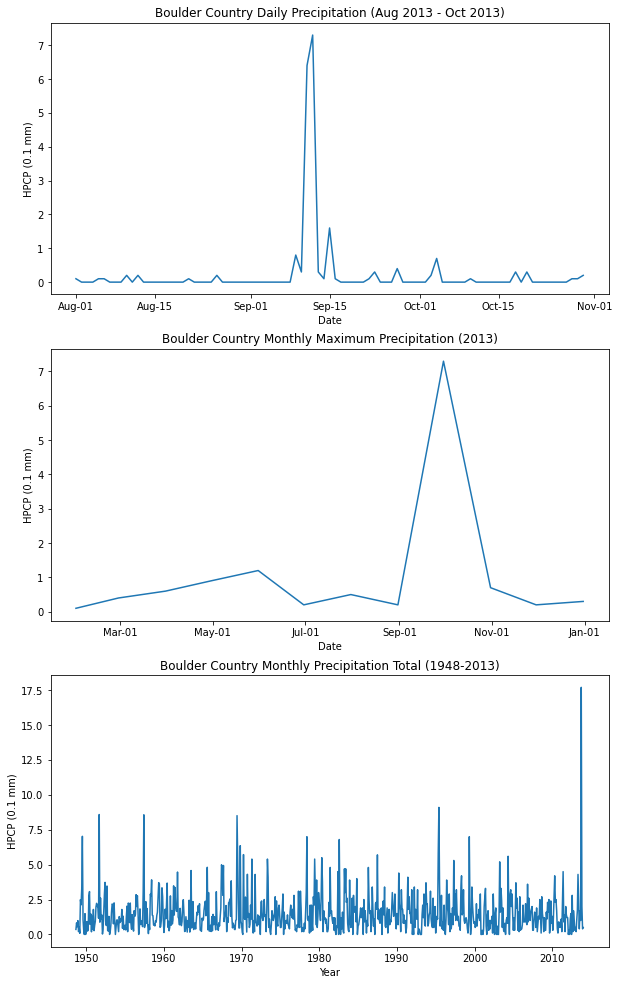

In [17]:
# set figure and size
f, ax = plt.subplots(3, 1, figsize=(10, 17))

# plot daily precip values from Aug 2013 to Oct 2013
ax[0].plot(precip_flood_range)
# date formatting
ax[0].xaxis.set_major_formatter(DateFormatter('%b-%d'))
# setting plot elements
ax[0].set_title("Boulder Country Daily Precipitation (Aug 2013 - Oct 2013)")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("HPCP (0.1 mm)")


# plot monthly max precip values in 2013
ax[1].plot(precip_monthly_max_df)
# ax[1].plot(precip_monthly_max_df)
# date formatting
ax[1].xaxis.set_major_formatter(DateFormatter('%b-%d'))
# setting plot elements
ax[1].set_title("Boulder Country Monthly Maximum Precipitation (2013)")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("HPCP (0.1 mm)")


# plot monthly precipitation totals for all years
ax[2].plot(precip_monthly_sum)
# date formatting
ax[2].xaxis.set_major_formatter(DateFormatter('%Y'))
# setting plot elements
ax[2].set_title("Boulder Country Monthly Precipitation Total (1948-2013)")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("HPCP (0.1 mm)")

## Challenge 2: Repeat the same analysis using discharge data

Using the same functions as above, read in your discharge data. Don't forget to use the `parse_dates` argument to parse the `datetime` column, and to set the `na_values` to the value specified in the information given about this data above. Set the `datetime` column to be the index of the DataFrame.

Call the final `DataFrame` object at the end of the cell. 

In [18]:
# read in discharge data, parse dates, and set index
discharge_df = pd.read_csv(streamflow_path,
                           parse_dates=['datetime'],
                           index_col=['datetime'])

discharge_df

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A
...,...,...,...,...
2013-12-27,USGS,6730200,38.0,A
2013-12-28,USGS,6730200,32.0,A
2013-12-29,USGS,6730200,31.0,A


In [19]:
# DO NOT MODIFY THIS CELL

student_discharge_answer = _

discharge_data_points = 0

if student_discharge_answer.index.name == 'datetime':
    print("\u2705 Your discharge DataFrame has the date as the index, "
          "good job!")
    discharge_data_points += 1
else:
    print("\u274C Your discharge DataFrame does not have the date as "
          "the index.")

if student_discharge_answer.index.dtype == np.dtype('datetime64[ns]'):
    print("\u2705 Your daily subset values for the discharge DataFrame "
          "has the date set as datetime type, good job!")
    discharge_data_points += 1
else:
    print("\u274C Your daily subset values for the discharge DataFrame "
          "does not have the date set as datetime type.")

if round(student_discharge_answer.disValue.sum(), 0)==932816:
    print("\u2705 Your discharge DataFrame has the expected values in "
          "it, good job!")
    discharge_data_points += 3
else:
    print("\u274C Your discharge DataFrame does not have the expected "
          "values in it.")

print("\n \u27A1 You received {} out of 5 points for opening the "
      "discharge data."
      .format(discharge_data_points))

discharge_data_points

✅ Your discharge DataFrame has the date as the index, good job!
✅ Your daily subset values for the discharge DataFrame has the date set as datetime type, good job!
✅ Your discharge DataFrame has the expected values in it, good job!

 ➡ You received 5 out of 5 points for opening the discharge data.


5

### Challenge 2a: Subset Stream Discharge Data To Your Study Time Period

In the cell below, subset the stream discharge data to the same timeframe 
that you are interested in: August 1st, 2013 to October 31st, 2013. This should include both August 1st and October 31st. Check your dataframe to ensure it starts and stops on the correct dates, some subsetting methods will return slightly different start and end times!

Call the final `DataFrame` object at the end of the cell. 

In [20]:
# selecting time range
discharge_flood_range = discharge_df.loc['2013-08-01':'2013-10-31']

discharge_flood_range

,agency_cd,site_no,disValue,qualCode
datetime,,,,
2013-08-01,USGS,6730200,64.0,A
2013-08-02,USGS,6730200,68.0,A
2013-08-03,USGS,6730200,65.0,A
2013-08-04,USGS,6730200,65.0,A
2013-08-05,USGS,6730200,62.0,A
...,...,...,...,...
2013-10-27,USGS,6730200,156.0,A
2013-10-28,USGS,6730200,148.0,A
2013-10-29,USGS,6730200,123.0,A


In [21]:
# DO NOT MODIFY THIS CELL

q_daily_sum_student = _

q_daily_points = 0


if q_daily_sum_student.index.name == 'datetime':
    print("\u2705 Your daily subset values for the discharge DataFrame "
          "has the date as the index, good job!")
    q_daily_points += 1
else:
    print("\u274C Your daily subset values for the discharge DataFrame "
          "does not have the date as the index.")

if q_daily_sum_student.index.dtype == np.dtype('datetime64[ns]'):
    print("\u2705 Your daily subset values for the discharge DataFrame "
          "has the date set as datetime type, good job!")
    q_daily_points += 1
else:
    print("\u274C Your daily subset values for the discharge DataFrame "
          "does not have the date set as datetime type.")

if (q_daily_sum_student.index.min()==pd.to_datetime('2013-08-01')
    and q_daily_sum_student.index.max()==pd.to_datetime('2013-10-31')):
    print("\u2705 Your daily subset values for the discharge DataFrame "
          "has been subset correctly, good job!")
    q_daily_points += 1
else:
    print("\u274C Your daily subset values for the discharge DataFrame "
          "has not been subset correctly.")

if round(q_daily_sum_student.disValue.sum(), 0)==34349:
    print("\u2705 Your daily subset values for the discharge DataFrame "
          "has the expected values in it, good job!")
    q_daily_points += 2
else:
    print("\u274C Your daily subset values for the discharge DataFrame "
          "does not have the expected values in it.")

print("\n \u27A1 You received {} out of 5 points for getting the daily "
      "subset values of the discharge data."
      .format(q_daily_points))

q_daily_points

✅ Your daily subset values for the discharge DataFrame has the date as the index, good job!
✅ Your daily subset values for the discharge DataFrame has the date set as datetime type, good job!
✅ Your daily subset values for the discharge DataFrame has been subset correctly, good job!
✅ Your daily subset values for the discharge DataFrame has the expected values in it, good job!

 ➡ You received 5 out of 5 points for getting the daily subset values of the discharge data.


5

### Challenge 2b: Calculate the Monthly Maximum and Sum for Stream Discharge Data in 2013

Use your original stream discharge dataset to calculate the maximum 
daily discharge rate **for each month in the year 2013**.

HINT: you can calculate multiple summary values using the `.agg()` method.
The approach looks like this:

```python
(your_df['year-here']
 .resample('value-here')
 .agg(new_max_column_name=('column-you-want-to-summarize', 'max'),
      new_sum_column_name=('column-you-want-to-summarize', 'sum')))
```

Call the final `DataFrame` object at the end of the cell. 

In [22]:
# resampling by month to get monthly precipitation sum and max values
discharge_flood_range_aggs = (
    discharge_df.loc['2013']
    .resample('M')
    .agg(max_discharge=('disValue', 'max'),
         sum_discharge=('disValue', 'sum'))
)

discharge_flood_range_aggs

,max_discharge,sum_discharge
datetime,,
2013-01-31,26.0,332.4
2013-02-28,4.7,93.6
2013-03-31,8.9,183.1
2013-04-30,35.0,477.2
2013-05-31,501.0,6937.0
2013-06-30,629.0,7888.0
2013-07-31,136.0,2714.0
2013-08-31,108.0,1704.0
2013-09-30,4770.0,25844.0


In [23]:
# DO NOT MODIFY THIS CELL

q_monthly_max_student = _

q_monthly_max_points = 0

if q_monthly_max_student.index.name == 'datetime':
    print("\u2705 Your monthly summary values for the discharge "
          "DataFrame has the date as the index, good job!")
    q_monthly_max_points += 1
else:
    print("\u274C Your monthly summary values for the discharge "
          "DataFrame does not have the date as the index.")

if q_monthly_max_student.index.dtype == np.dtype('datetime64[ns]'):
    print("\u2705 Your monthly summary values for the discharge "
          "DataFrame has the date set as datetime type, good job!")
    q_monthly_max_points += 1
else:
    print("\u274C Your monthly summary values for the discharge "
          "DataFrame does not have the date set as datetime type.")

try:
    if round(q_monthly_max_student.sum().sum(), 0)==62745:
        print("\u2705 Your discharge DataFrame has "
              "the expected values in it, good job!")
        q_monthly_max_points += 3
    else:
        print("\u274C Your discharge DataFrame does "
              "not have the expected values in it.")
except KeyError:
    print("Dataframe was not resampled correctly and is missing the "
          "max column.")

print("\n \u27A1 You received {} out of 5 points for getting the "
      "monthly maximum of the discharge data."
      .format(q_monthly_max_points))

q_monthly_max_points

✅ Your monthly summary values for the discharge DataFrame has the date as the index, good job!
✅ Your monthly summary values for the discharge DataFrame has the date set as datetime type, good job!
✅ Your discharge DataFrame has the expected values in it, good job!

 ➡ You received 5 out of 5 points for getting the monthly maximum of the discharge data.


5

### Challenge 2c: Calculate Monthly Total Stream Discharge

In the cell below, calculate the sum for each month of stream discharge for 
the entire time period in the data.

Be sure to call your dataframe at the end of the cell.

In [24]:
# resampling by month and summing precipitation value
discharge_monthly_sum = discharge_df.resample('M').sum()

discharge_monthly_sum

,site_no,disValue
datetime,,
1986-10-31,208636200,978.0
1986-11-30,201906000,1556.0
1986-12-31,208636200,2000.0
1987-01-31,208636200,2116.0
1987-02-28,188445600,1653.0
...,...,...
2013-08-31,208636200,1704.0
2013-09-30,201906000,25844.0
2013-10-31,208636200,6801.0


In [25]:
# DO NOT MODIFY THIS CELL

student_discharge_sum = _

discharge_monthly_sum_points = 0

if (student_discharge_sum.index.year.min()==1986
  and student_discharge_sum.index.year.max()==2013):
    print("\u2705 Your data has been subset to the correct dates, "
          "good job!")
    discharge_monthly_sum_points += 1
else:
    print("\u274C Your data has not been subset to the correct dates.")

if round(student_discharge_sum.disValue.max(), 0)==26048:
    print("\u2705 Your monthly sum for the discharge DataFrame has "
          "the expected values in it, good job!")
    discharge_monthly_sum_points += 4
else:
    print("\u274C Your monthly sum for the discharge DataFrame does "
          "not have the expected values in it.")

print("\n \u27A1 You received {} out of 5 points for resampling the "
      "monthly sums of the discharge data."
      .format(discharge_monthly_sum_points))

discharge_monthly_sum_points

✅ Your data has been subset to the correct dates, good job!
✅ Your monthly sum for the discharge DataFrame has the expected values in it, good job!

 ➡ You received 5 out of 5 points for resampling the monthly sums of the discharge data.


5

## Challenge 2e: Figure - Plot Stream Discharge Data

Create a vertically stacked figure that contains the following stream discharge subplots (You should have all of the data above needed to create these figures:

* Subplot 1: daily discharge values from Aug 1, 2013 to Oct 31, 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 2: Monthly maximum stream discharge for 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 3: monthly totals of discharge for all years in dataset
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis label should be Year (e.g. "2013")
       
You can use the `DateFormatter` package imported above to ensure you x axis labels are formatted correctly. 

BONUS (10 pts extra credit): Notice that you are repeating a lot of code here? Write a function to produce this plot from any daily `DataFrame`, and use it to generate your plots here and above. What parameters do you need to generalize your approach?

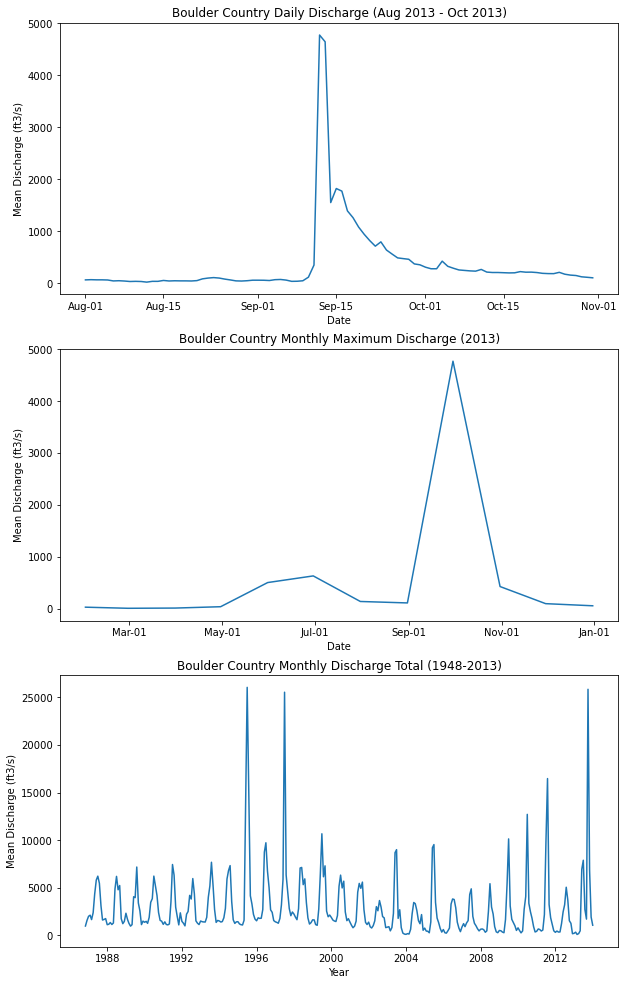

In [26]:
# function to produce plot
def plot_time_series(df, axis, format_, title, xlabel, ylabel):
    # plot inputted df on inputted axis
    axis.plot(df)
    # set date formatter
    axis.xaxis.set_major_formatter(DateFormatter(format_))
    # set elements
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)


# set figure and size
fig, axis = plt.subplots(3, 1, figsize=(10, 17))

# plot daily discharge Aug 2013 - Oct 2013
plot_time_series(
    discharge_flood_range.resample('D').sum().drop('site_no', axis=1),
    axis=axis[0],
    format_="%b-%d",
    title='Boulder Country Daily Discharge (Aug 2013 - Oct 2013)',
    xlabel='Date',
    ylabel='Mean Discharge (ft3/s)'
)

# plot monthly max discharge 2013
plot_time_series(
    discharge_flood_range_aggs.max_discharge,
    axis=axis[1],
    format_="%b-%d",
    title='Boulder Country Monthly Maximum Discharge (2013)',
    xlabel='Date',
    ylabel='Mean Discharge (ft3/s)'
)

# plot monthly total discharge all time
plot_time_series(
    discharge_monthly_sum.drop('site_no', axis=1),
    axis=axis[2],
    format_="%Y",
    title='Boulder Country Monthly Discharge Total (1948-2013)',
    xlabel='Year',
    ylabel='Mean Discharge (ft3/s)'
)

## Challenge 3 - Figure of Precipitation and Discharge Combined

Above, you created code to plot precipitation and stream discharge in 
two different figures. Create a figure with two subplots stacked on 
top of each other in the cell below as follows:

1. Subplot 1: Daily total precipitation for the flood event time period (aug-october 2013)
2. Subplot 2: Daily stream discharge for the flood event time period (aug-october 2013)

HINT: You can use the SAME CODE that you used above to create the first 
precipitation plot and the first discharge plot to create these subplots! You will
just need to create a new figure and axis object(s) below.


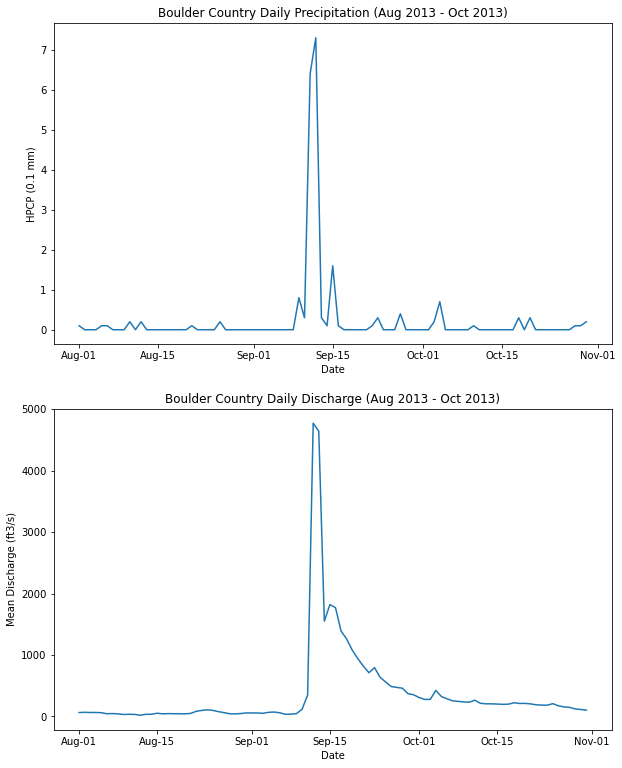

In [27]:
f_, ax_ = plt.subplots(2, 1, figsize=(10, 13))

# using function to plot daily precipitation during flood date range
plot_time_series(
    precip_flood_range,
    axis=ax_[0],
    format_="%b-%d",
    title='Boulder Country Daily Precipitation (Aug 2013 - Oct 2013)',
    xlabel='Date',
    ylabel='HPCP (0.1 mm)'
)

# using function to plot daily discharge during flood date range
plot_time_series(
    discharge_flood_range.resample('D').sum().drop('site_no', axis=1),
    axis=ax_[1],
    format_="%b-%d",
    title='Boulder Country Daily Discharge (Aug 2013 - Oct 2013)',
    xlabel='Date',
    ylabel='Mean Discharge (ft3/s)'
)

## Challenge 3b - Explain Patterns In the Data

For your final streamflow and precipitation plot, write an assertion-evidence style take away as a heading in the cell below. Follow up with 2-3 sentences or bullet points explaining your conclusion. Consider:

1. When was the peak precip / discharge period during the flood?
2. Do the dates associated with peak precip and discharge line up (are they the same?)?

### The 2013 Boulder Flood was Caused by Significant Rainfall on September 12th

As we can see from the plots above, the max precipitation and discharge occurred on September 12th (i.e, the same day). After September 12th, the discharge has a gradual decline while all the precipitation flows out. This gives evidence to the fact that September 12th is the sole contributor to the Boulder flood in 2013, considering rainfall before and after the date is very little.

## Pep 8, and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (3 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) (3 points)